In [ ]:
!pip3 install matplotlib
!pip3 install numpy

# RGB

In [3]:
val_loss = {}
train_loss = {}
with open("./newmodels_info/Training1/training_loss_rgb.txt") as f:
    lines = f.readlines()
    step = -1
    for line in lines:
        line = line.strip()
        if(line == "----------"):
            continue
        elif(line.split(" ")[0] == "Length"):
            continue
        elif(line.split(" ")[0] == "Step"):
            step += 1
        elif(line.split(" ")[0] == "val"):
            # val Loc Loss: 0.6253 Cls Loss: 0.6448 Tot Loss: 0.6351
            val_loss[step] = float(line.split(" ")[9])
        elif(line.split(" ")[0] == "train"):
            # train Loc Loss: 0.0032 Cls Loss: 0.0022 Tot Loss: 0.0027
            train_loss[step] = float(line.split(" ")[9])

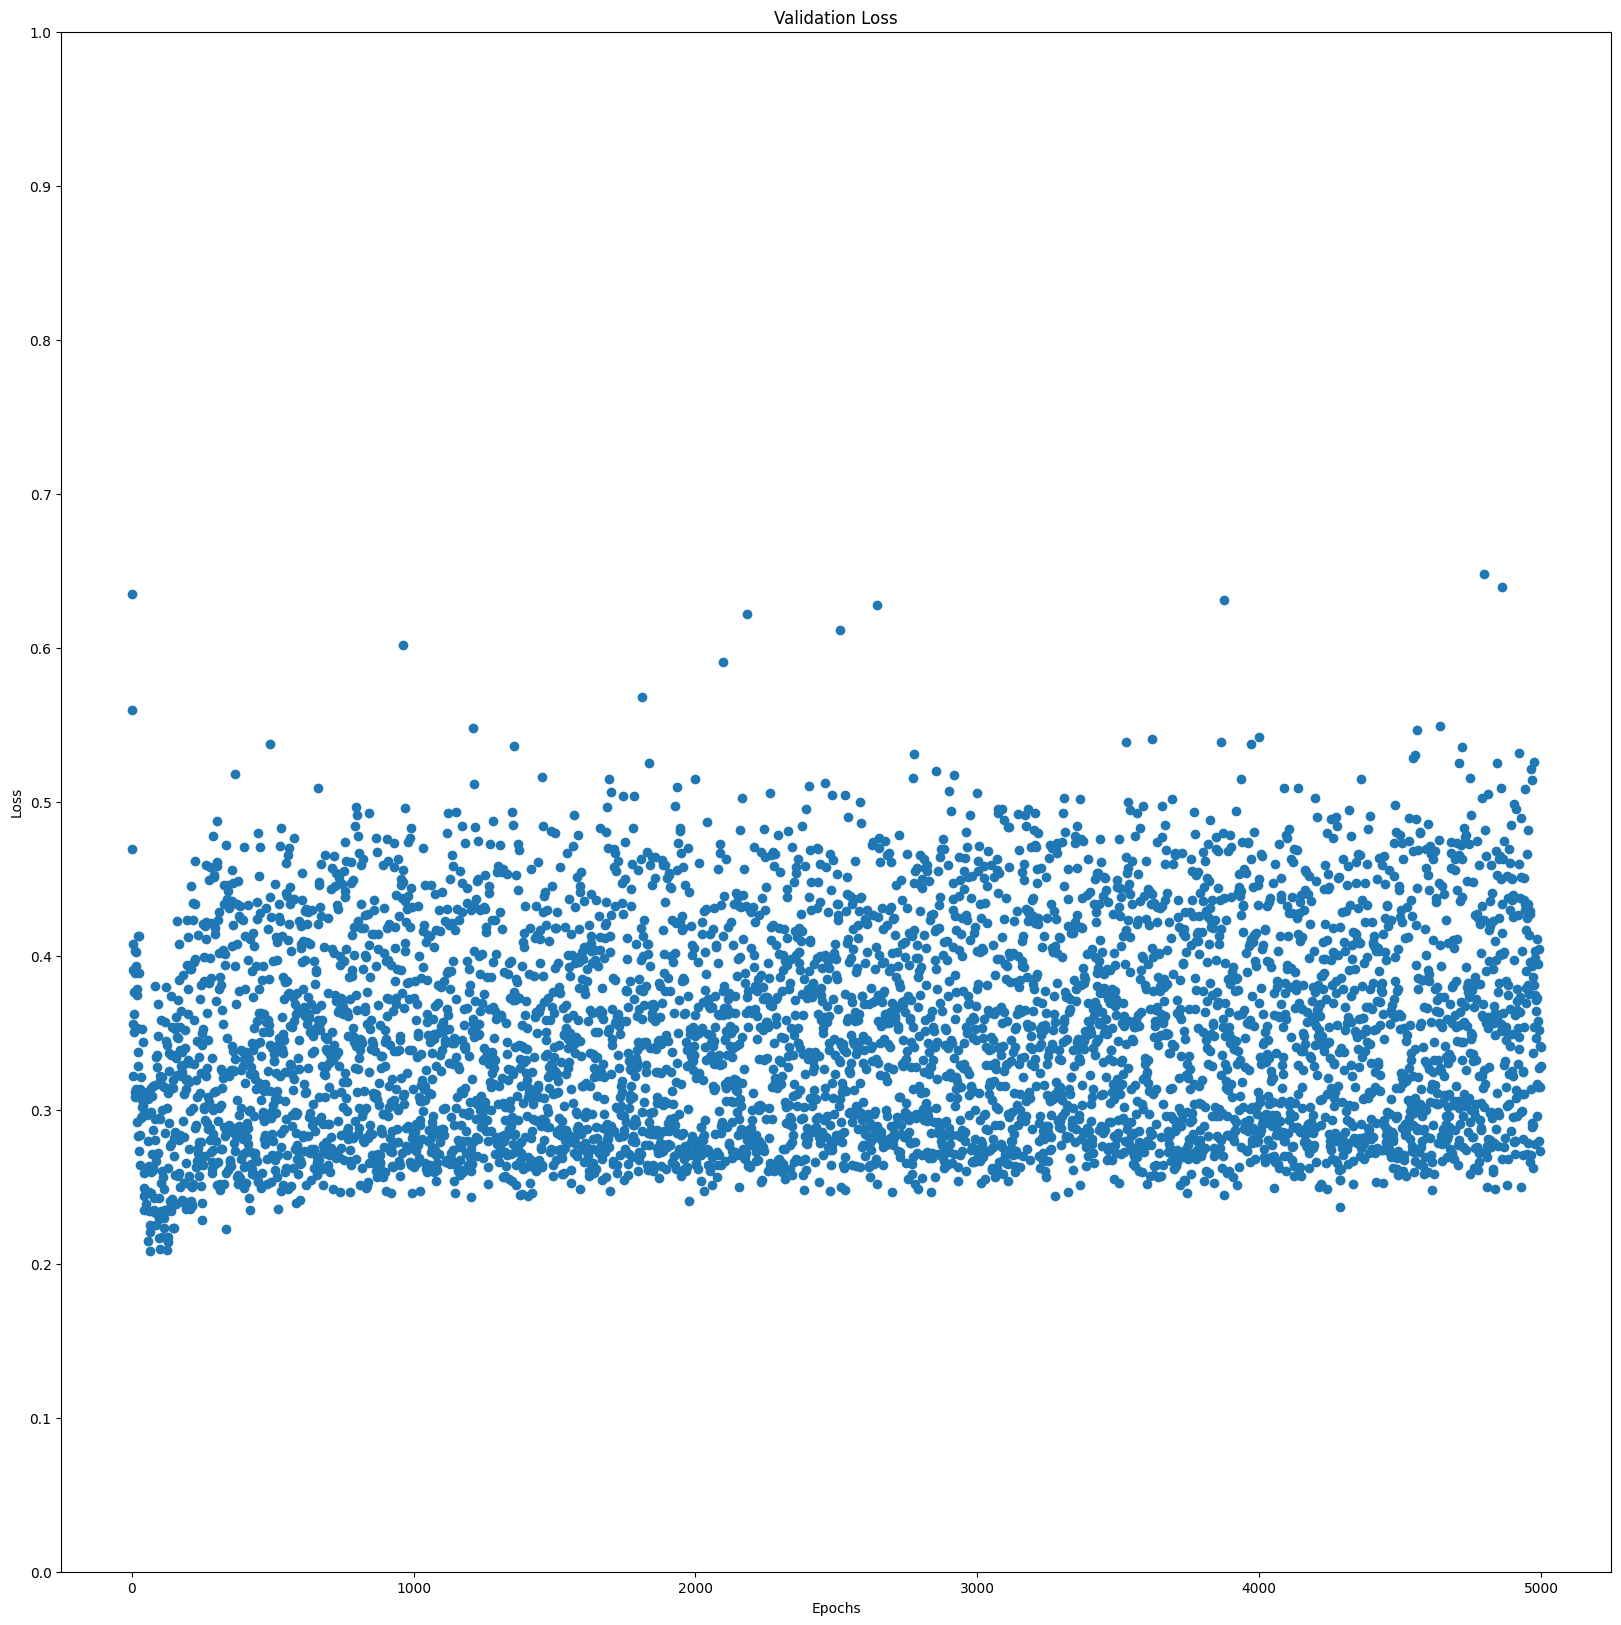

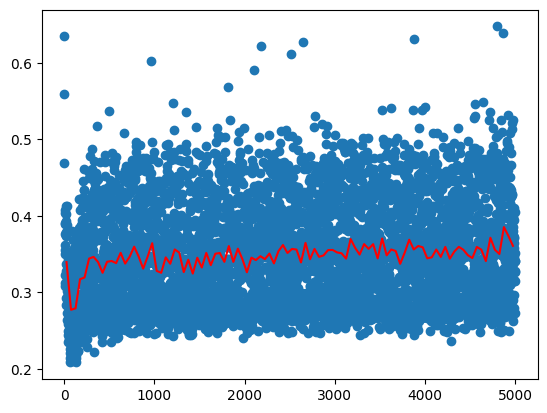

In [4]:
import matplotlib.pyplot as plt
import numpy as np
lists = sorted(val_loss.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
x = list(x)
y = list(y)
# x = x[:1000]
# y = y[:1000]
# y=np.array(y)
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x, y, 'o')
ax.set(xlabel='Epochs', ylabel='Loss', title='Validation Loss')
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# ax.fill_between(x, y-(np.std(y)/np.sqrt(len(y))), y+(np.std(y)/np.sqrt(len(y))))
# fig.savefig("test.svg")
plt.show()

nbins = 100
n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
# sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
# std = np.sqrt(sy2/n - mean*mean)

plt.plot(x, y, 'o')
plt.errorbar((_[1:] + _[:-1])/2, mean, fmt='r-')
                                #  yerr=std
plt.show()

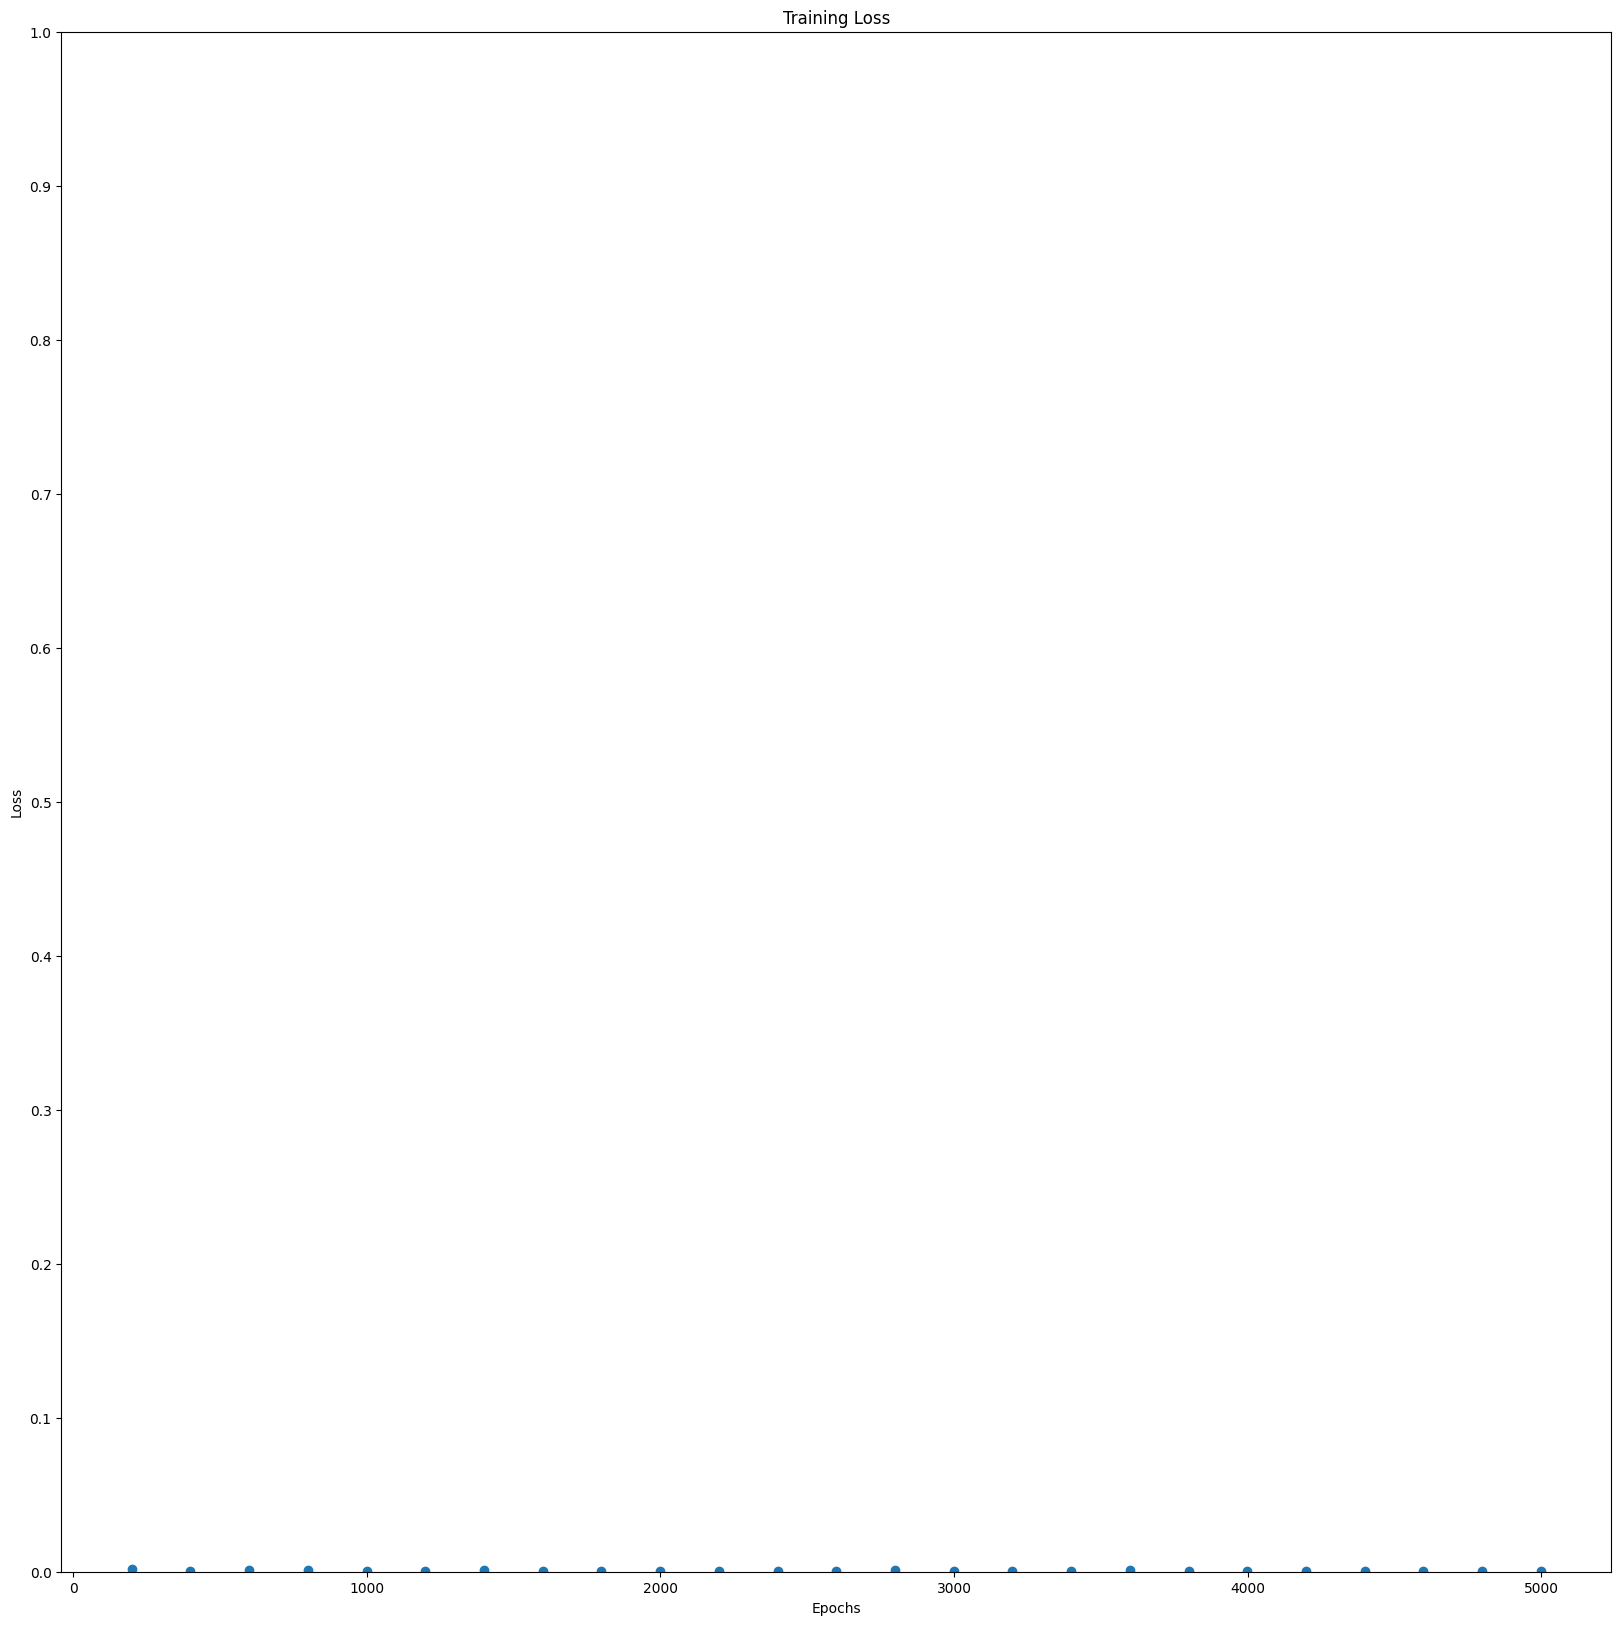

In [5]:
import matplotlib.pyplot as plt
import numpy as np
lists = sorted(train_loss.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
x = list(x)
y = list(y)
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x, y, 'o')
ax.set(xlabel='Epochs', ylabel='Loss', title='Training Loss')
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# fig.savefig("test.svg")
plt.show()